# Chennai House Price Prediction

## Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

## Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

## DATASET

https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view?usp=sharing

**First let us import all the necessary python packages for the analysis**


In [1]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xgb

In [2]:
data = pd.read_csv("E:\Data Science Live Recordings\CHENNAI HOUSE PRICE PREDICTION\DATASET.csv")
pd.set_option('display.max_columns', None)
data.head(3)

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   

   REG_FEE  COMMIS  SALES_PRICE  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200

# CLEANING THE DATA

In [3]:
# Removing all the null values
data.dropna(inplace=True)

# Renaming all the column names in lowercase letters
data.columns = data.columns.str.lower()


# Renaming all the string in area column names in lowercase letters
data.area = data.area.str.lower()

# Correcting the spelling mistakes in area columns
data.area = data.area.replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})


# Renaming all the string in sale_cond column names in lowercase letters
data.sale_cond = data.sale_cond.str.lower()

# Correcting the spelling mistakes in sale_cond columns
data.sale_cond = data.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})


# Renaming all the string in park_facil column names in lowercase letters
data.park_facil = data.park_facil.str.lower()

# Correcting the spelling mistakes in park_facil columns
data.park_facil = data.park_facil.replace({'noo':'no'})


# Renaming all the string in buildtype column names in lowercase letters
data.buildtype = data.buildtype.str.lower()

# Correcting the spelling mistakes in buildtype columns
data.buildtype = data.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})


# Renaming all the string in utility_avail column names in lowercase letters
data.utility_avail = data.utility_avail.str.lower()

# Correcting the spelling mistakes in utility_avail columns
data.utility_avail = data.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})
                                            
                                            
# Renaming all the string in street column names in lowercase letters
data.street = data.street.str.lower()

# Correcting the spelling mistakes in street columns
data.street = data.street.replace({'pavd':'paved', 
                       'noaccess':'no access'})


# Renaming all the string in mzzone column names in lowercase letters
data.mzzone = data.mzzone.str.lower()

# Fixing the correct Data Type of columns
data.n_bedroom = data.n_bedroom.astype(int)
data.n_bathroom = data.n_bathroom.astype(int)

# Correcting Date columnd from object to daterime format
data.date_sale = pd.to_datetime(data.date_sale, format='%d-%m-%Y')
data.date_build = pd.to_datetime(data.date_build, format='%d-%m-%Y')

# Creating property_age column which deternine how old the property id
data['property_age'] = pd.DatetimeIndex(data.date_sale).year - pd.DatetimeIndex(data.date_build).year

# Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns
data['total_price'] = pd.DataFrame(data.reg_fee	+ data.commis	+ data.sales_price)

# Rearranging the columns of dataframe 
data = data.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])

data.head(3)

prt_id        area sale_cond park_facil   buildtype utility_avail  street  \
0  P03210  karapakkam  abnormal        yes  commercial        allpub   paved   
1  P09411  anna nagar  abnormal         no  commercial        allpub  gravel   
2  P01812       adyar  abnormal        yes  commercial           elo  gravel   

  mzzone date_build  date_sale  property_age  int_sqft  dist_mainroad  \
0      a 1967-05-15 2011-05-04            44      1004            131   
1     rh 1995-12-22 2006-12-19            11      1986             26   
2     rl 1992-02-09 2012-02-04            20       909             70   

   n_bedroom  n_bathroom  n_room  qs_rooms  qs_bathroom  qs_bedroom  \
0          1           1       3       4.0          3.9         4.9   
1          2           1       5       4.9          4.2         2.5   
2          1           1       3       4.1          3.8         2.2   

   qs_overall  reg_fee  commis  sales_price  total_price  
0       4.330   380000  144400      7600000      8124400  
1       3.765   760122  304049     21717770     22781941  
2       3.090   421094   92114     13159200     13672408

## EXPLORATORY DATA ANALYSIS

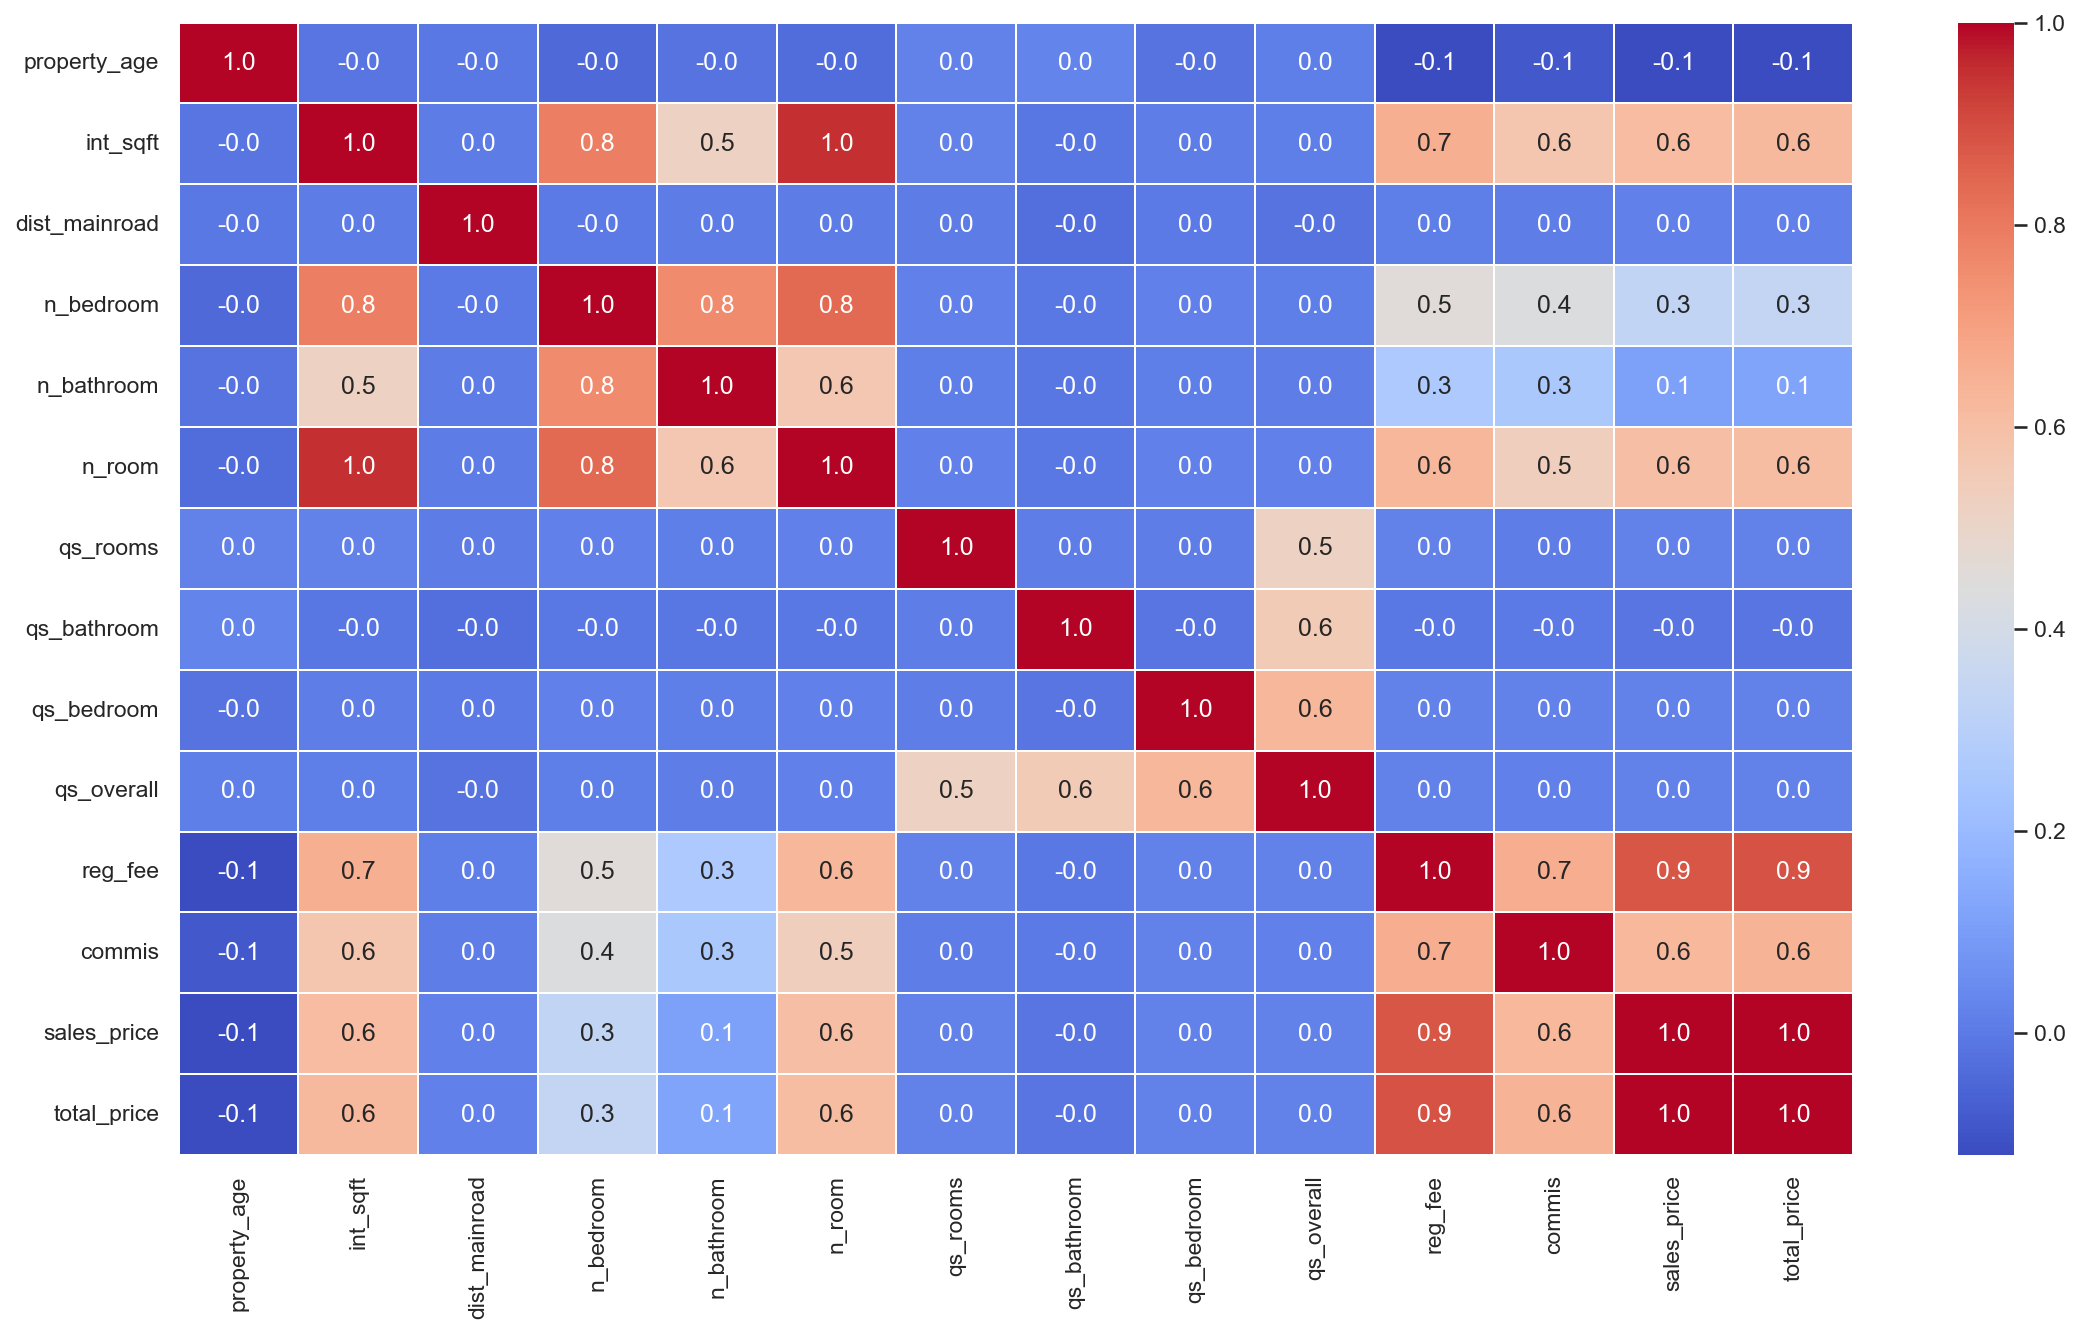

In [4]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=True, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

From the above heatmap, we can see that,
> 1. Correlation do exist between certain columns inside the data

> 2. Some strong positive correlation has been observed between the interior area variable and number of rooms,number of bathrooms. More the interior area more the rooms and bathrooms, so is the price of registration, commission, sales price adding to increase in total price tag(Obvious!)

> 3. Bathroom increases with increase in bedrooms and rooms in general

> 4. Commission, salesprice and overall prices are strongly co-related to each other

> 5. We see some slight negetive correlation with respect to building age and distance from main road. Older the building, nearer it is to the main road. As the distance of the house increases from the main road, lower is the price of the house **although low in number of such instances as the data spreads over several years**.

## FEATURE DISTRIBUTION PLOT

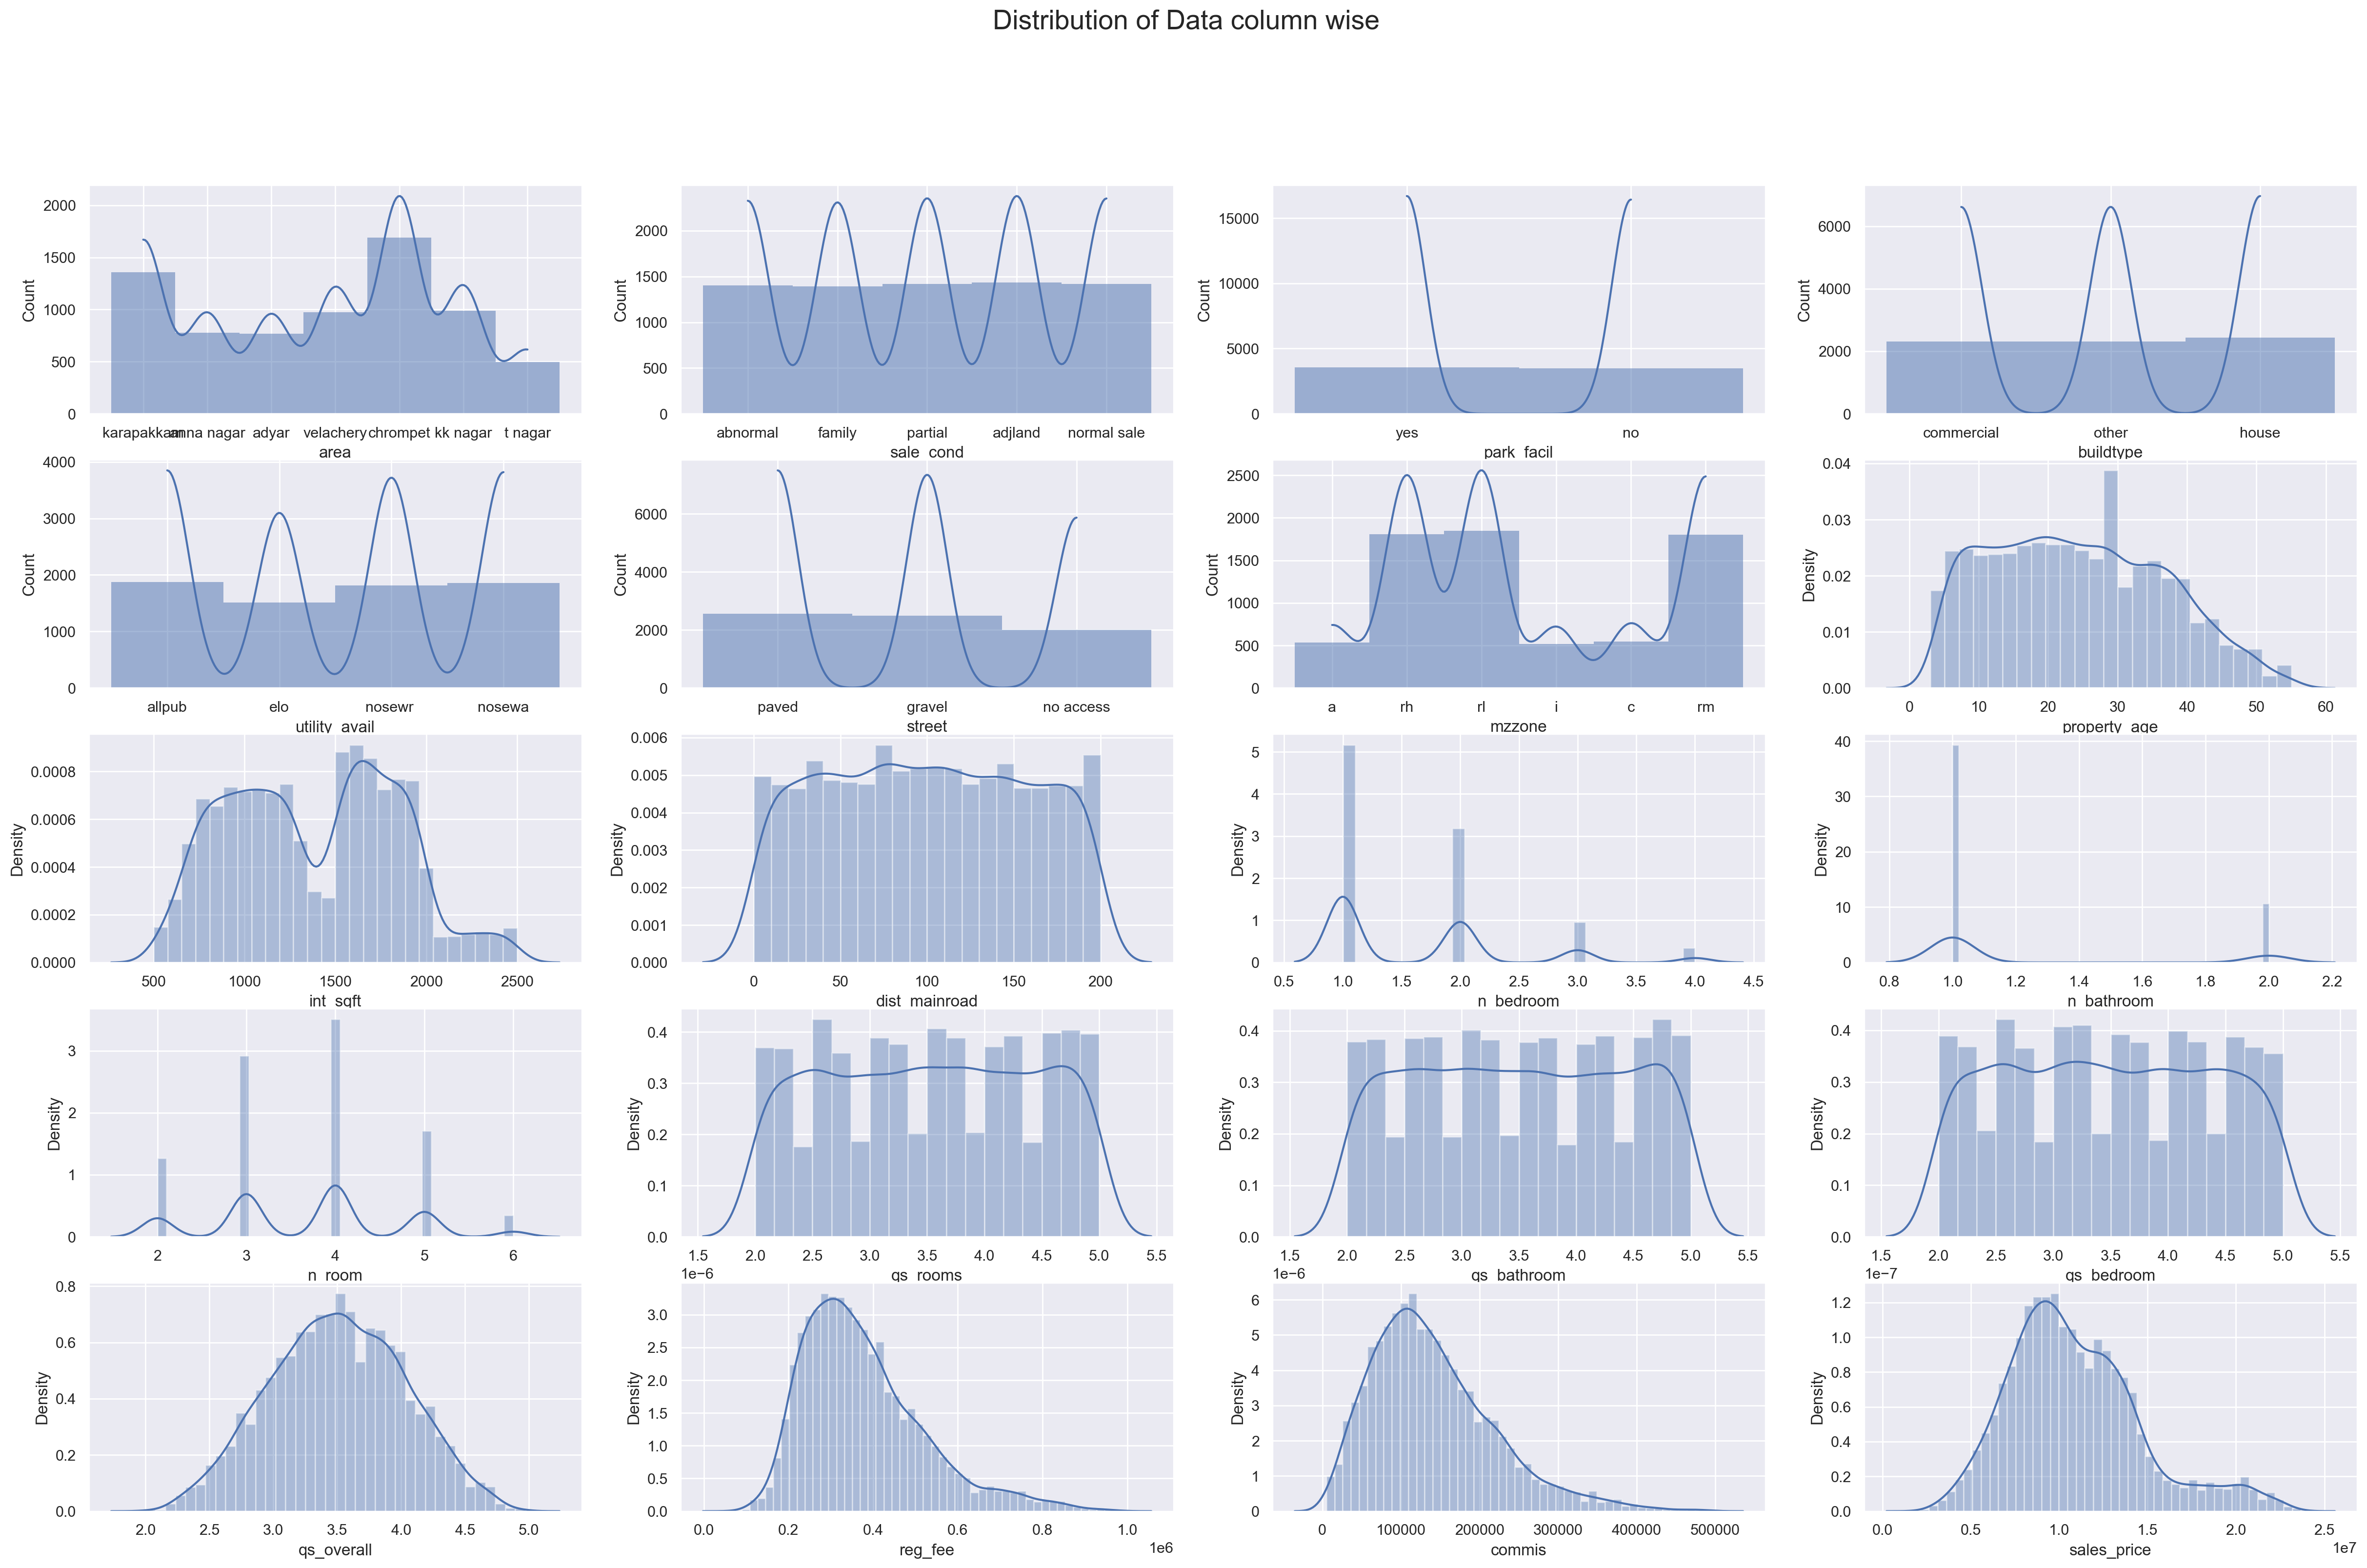

In [5]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(data.area, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(data.sale_cond, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(data.park_facil, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(data.buildtype, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(data.utility_avail, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(data.street, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(data.mzzone, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(data.property_age)

plt.subplot(5,4,9)
sns.distplot(data.int_sqft)

plt.subplot(5,4,10)
sns.distplot(data.dist_mainroad)

plt.subplot(5,4,11)
sns.distplot(data.n_bedroom)

plt.subplot(5,4,12)
sns.distplot(data.n_bathroom)

plt.subplot(5,4,13)
sns.distplot(data.n_room)

plt.subplot(5,4,14)
sns.distplot(data.qs_rooms)

plt.subplot(5,4,15)
sns.distplot(data.qs_bathroom)

plt.subplot(5,4,16)
sns.distplot(data.qs_bedroom)

plt.subplot(5,4,17)
sns.distplot(data.qs_overall)

plt.subplot(5,4,18)
sns.distplot(data.reg_fee)

plt.subplot(5,4,19)
sns.distplot(data.commis)

plt.subplot(5,4,20)
sns.distplot(data.sales_price)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

In [6]:
from IPython.display import display
data.skew(axis=0, skipna=True, numeric_only=True)

property_age     0.265715
int_sqft         0.133384
dist_mainroad    0.018041
n_bedroom        1.163635
n_bathroom       1.401149
n_room           0.121610
qs_rooms        -0.018013
qs_bathroom      0.001500
qs_bedroom       0.017361
qs_overall      -0.007936
reg_fee          1.041678
commis           0.955685
sales_price      0.775507
total_price      0.781409
dtype: float64

In [7]:
data.mean(axis = 0, skipna = True, numeric_only=True)

property_age     2.427353e+01
int_sqft         1.381317e+03
dist_mainroad    9.956916e+01
n_bedroom        1.636621e+00
n_bathroom       1.213152e+00
n_room           3.686650e+00
qs_rooms         3.517177e+00
qs_bathroom      3.505896e+00
qs_bedroom       3.485332e+00
qs_overall       3.503389e+00
reg_fee          3.767919e+05
commis           1.409943e+05
sales_price      1.088801e+07
total_price      1.140579e+07
dtype: float64

From the above plot and output, we can interpret that,
> 1. Some houses are relatively new and majority of the houses are below 30 years of age. Average house age is 20
> 2. Many Houses have a single bedroom followed by two bedroom houses
> 3. Majority of the houses have single bathrooms. 20% of the bedrooms dont have attached bathrooms
> 4. Many houses lie in 'rh', 'rl' and 'rm' zones
> 5. Registration fee is generally on the lower side, increases with increase in interior area and number of rooms

Now we have two types of data in our dataset.
> 1. Catagorical data
> 2. Numerical data

Numerical data are further classified into
> 1. Continuous data
> 2. Discrete data

Now lets see if there is any relation between numerical features column and total sales

Here we are plotting all our Continous numerical variable columns with total price of the house to figure out, is there any relation between Continous numerical variable features column and total sales.

# Numerical Columns
1) Continous numerical variable
Here we are plotting all our Continous numerical variable columns with total price of the house to figure out, is there any relation between Continous numerical variable features column and total sales.

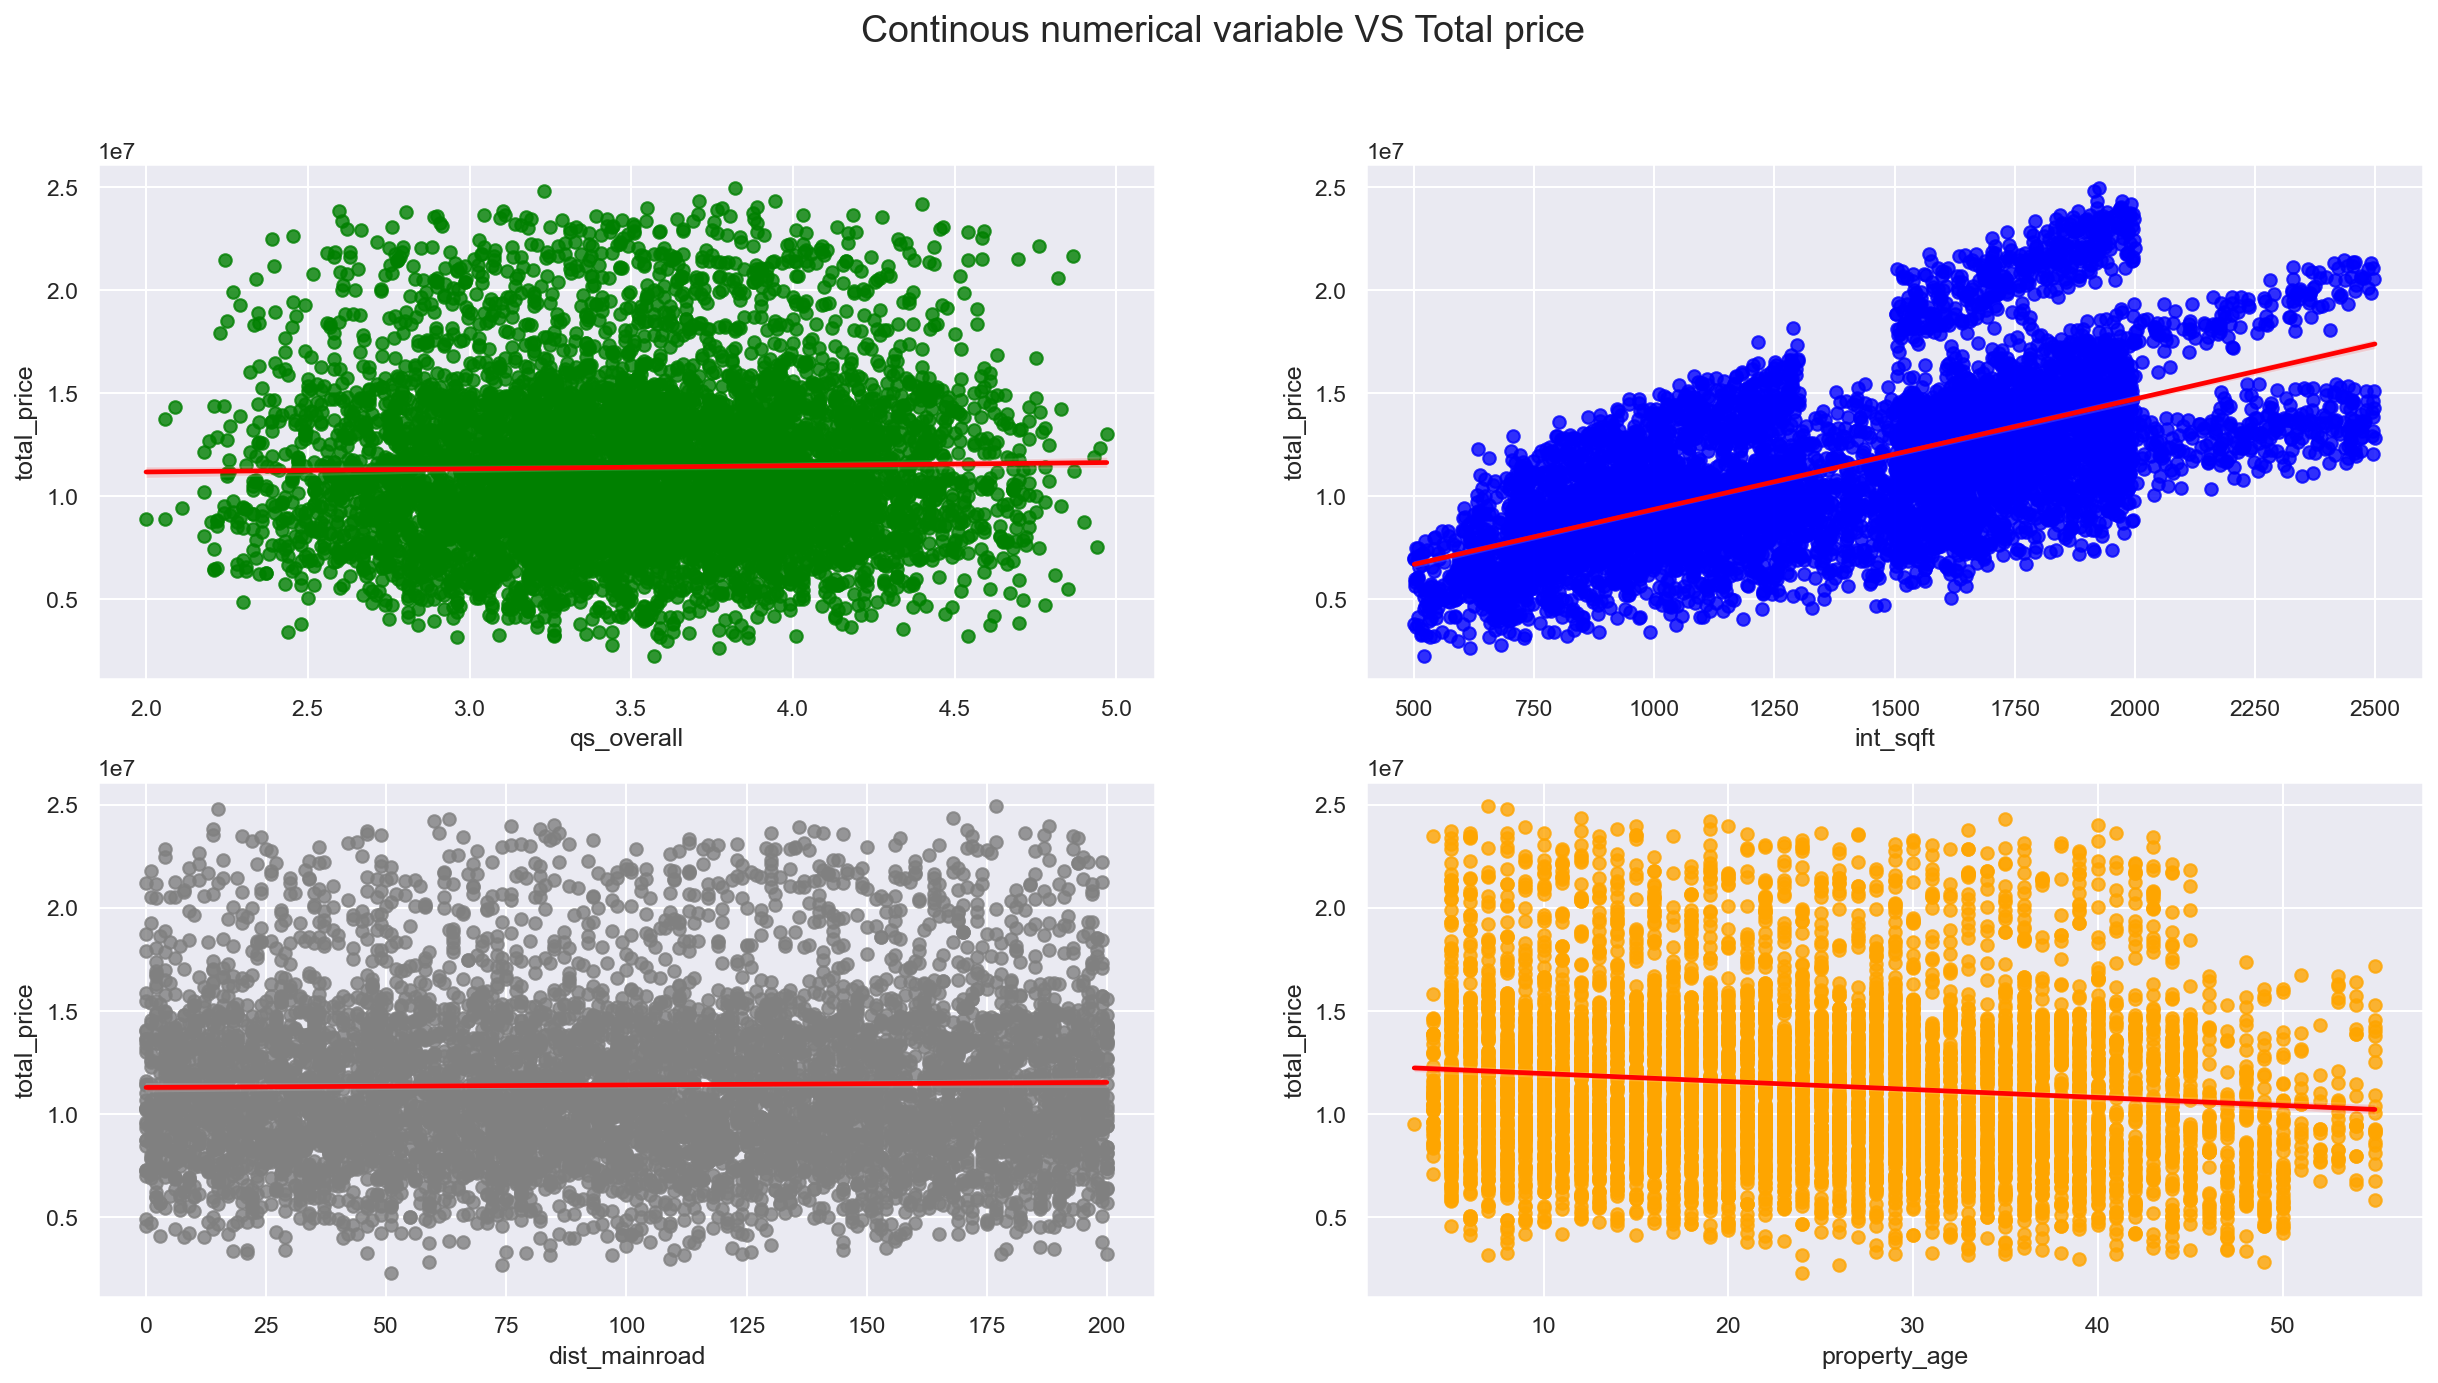

In [8]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(data.qs_overall, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(data.int_sqft, data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(data.dist_mainroad, data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(data.property_age, data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Total price", fontsize=18)
plt.show()

Interpretation from the above graphs,
> 1. qs_overall column does not give out any interpretations with respect to its behaviour with the total sales price
> 2. dist_mainroad too does not show any proper relation with respect to sales price
> 3. Sales price increases with increase in sqft
> 4. Sales price decreases as the age of the property increases


**Now, we will plot all our Discrete Numerical Variable columns with total price of the house to figure out, if there is any relation between variable features column and total sales.**

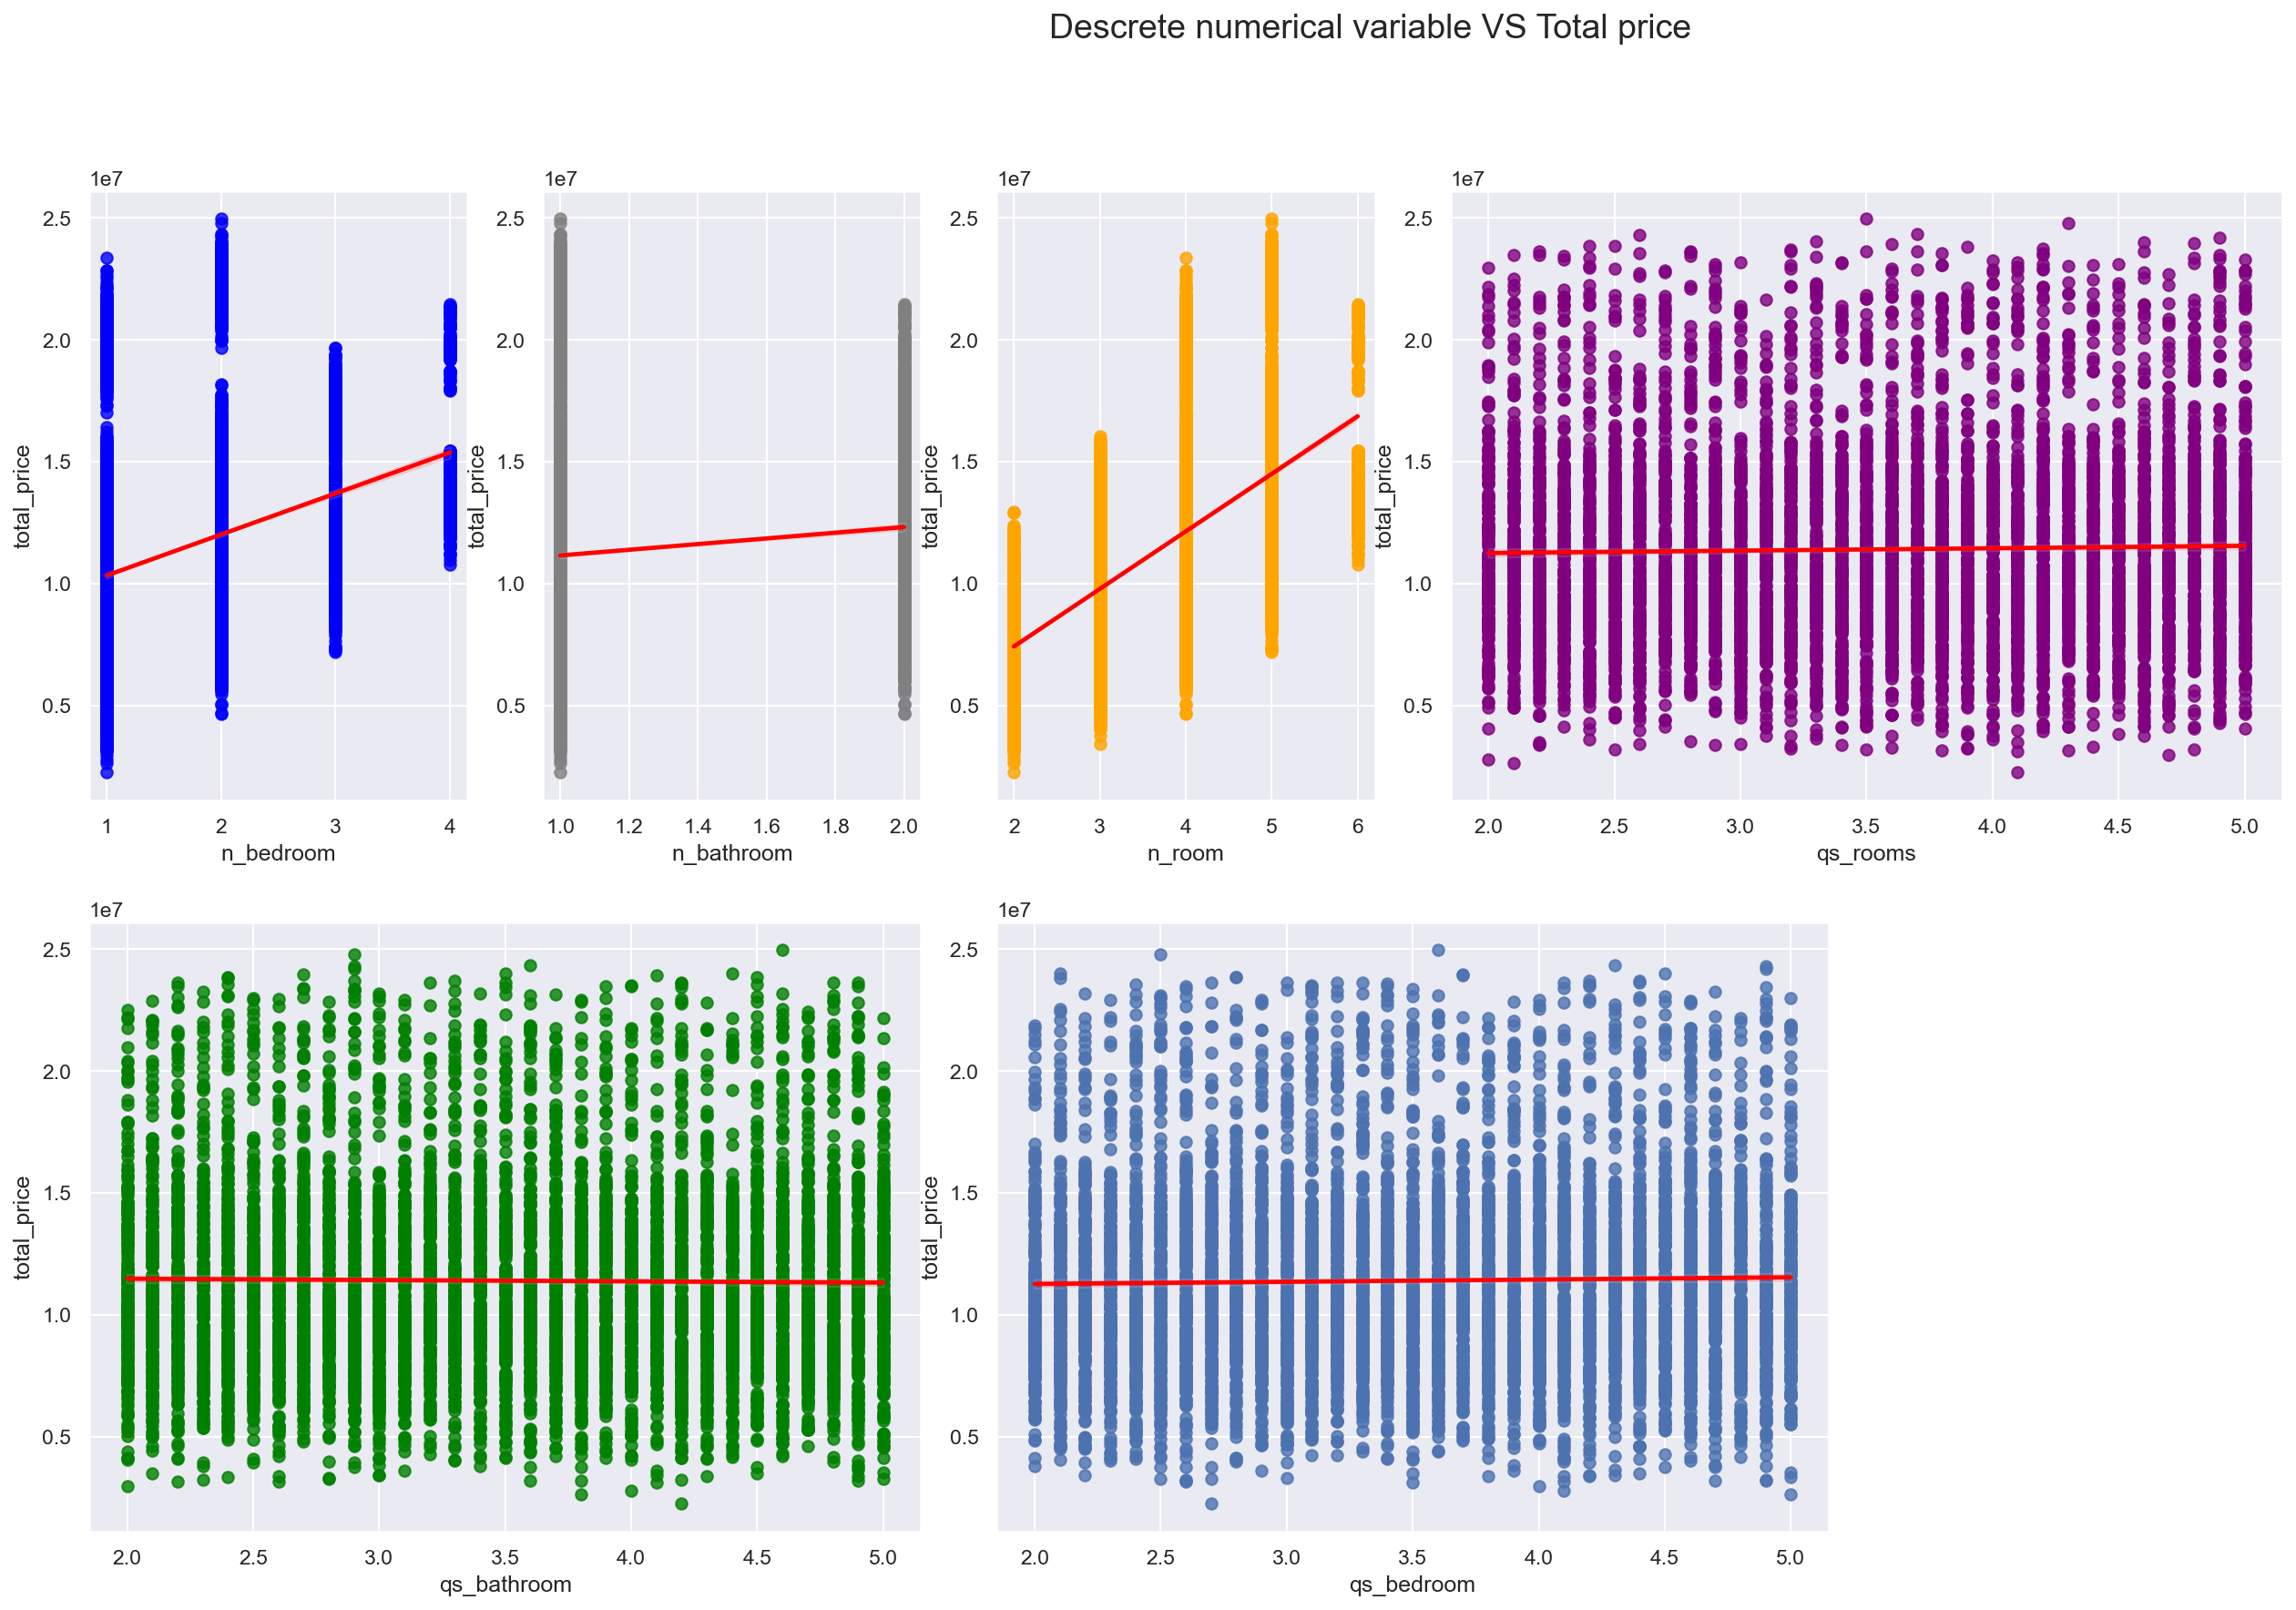

In [9]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(data.n_bedroom, data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(data.n_bathroom, data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(data.n_room, data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(data.qs_rooms, data.total_price, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(data.qs_bathroom, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(data.qs_bedroom, data.total_price, line_kws={"color": "red"})

plt.suptitle("Descrete numerical variable VS Total price", fontsize=18)
plt.show()

From the above graph,

> 1. Price Increases with increase in number of rooms, bathrooms and bedrooms

> 2. Price does not change with increase in mysterious qs_bathroom, qs_bedroom and qs_rooms 


### Commision and Registration fee columns:
On top of all numerical columns we are given registration fee and commission columns on which sales price don't depends on but these two columns are completly depended on sales column value. That means after determining the sales price the commission and registration fee are paid.
  Hence, these two columns don't directly contribute to determine the sale we can add value of these two column on sales column and try to predict total sale price. And at the end compare this result with only predicted sales price.

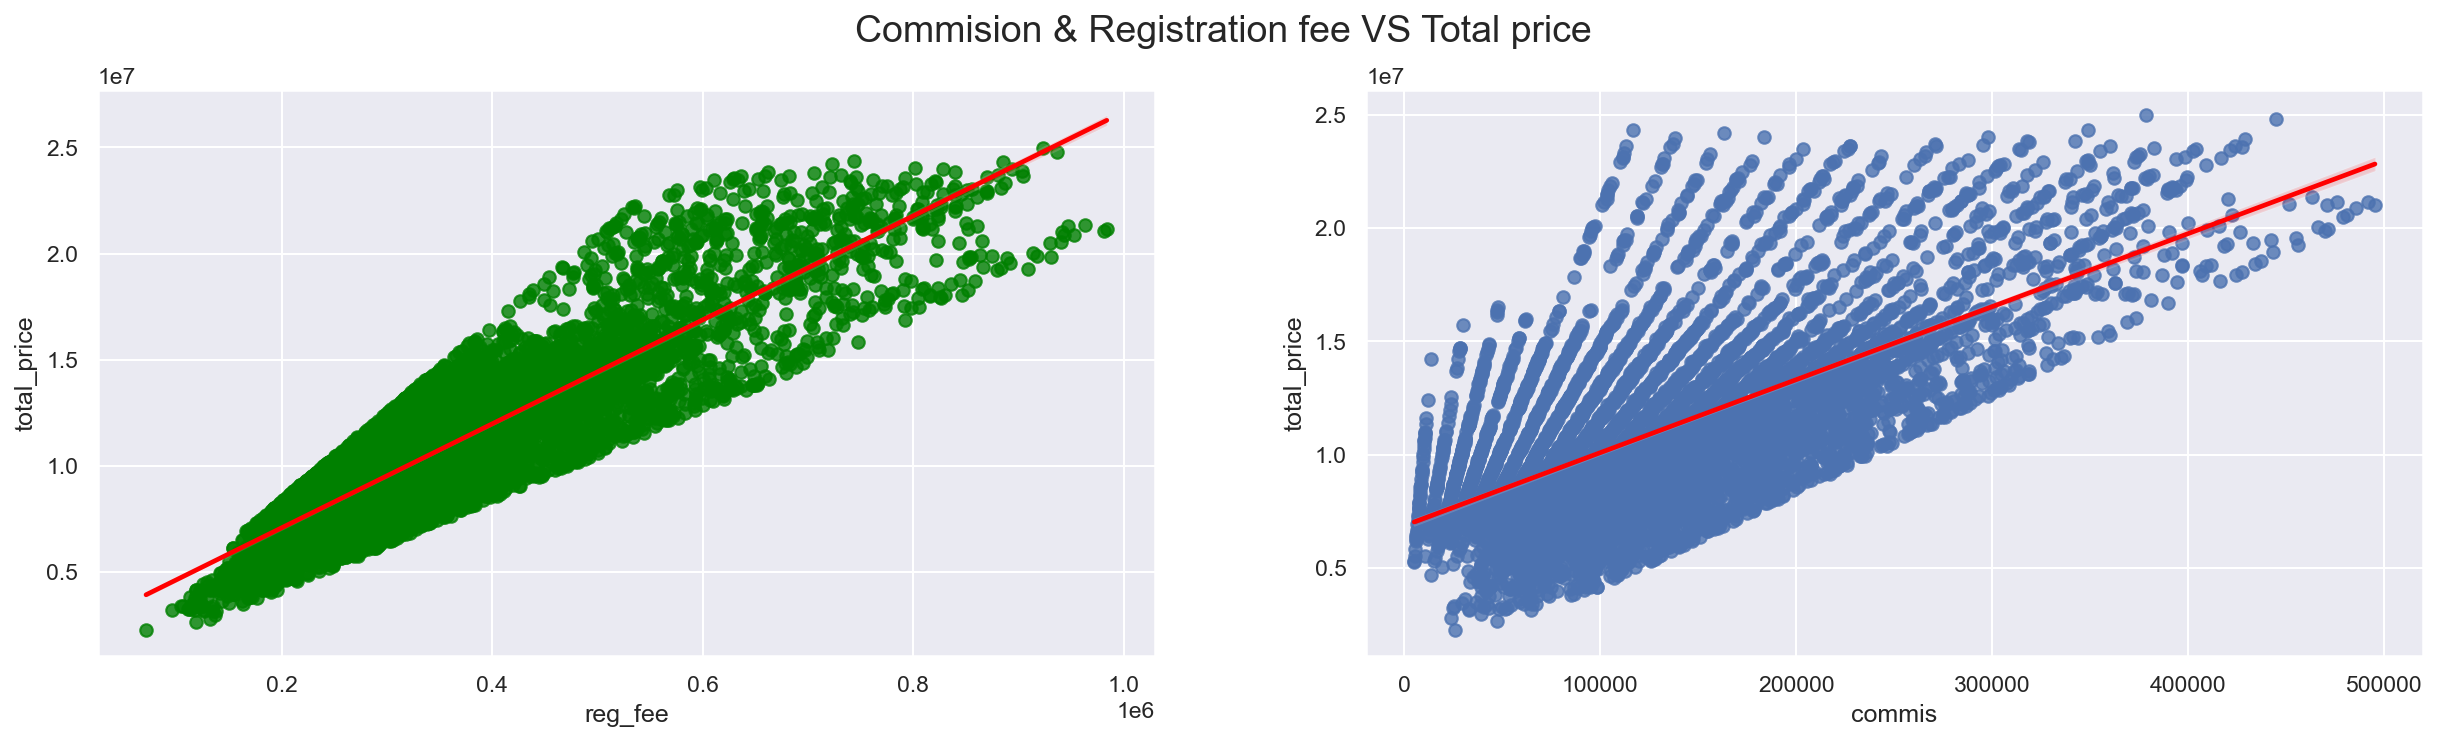

In [10]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(data.reg_fee, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(data.commis, data.total_price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

# Categorical Columns
### Plotting of Categorical data vs Target
Here we are plotting all our catagorical columns with total price of the house to figure out, is there any relation between catagorical features column and total sales.

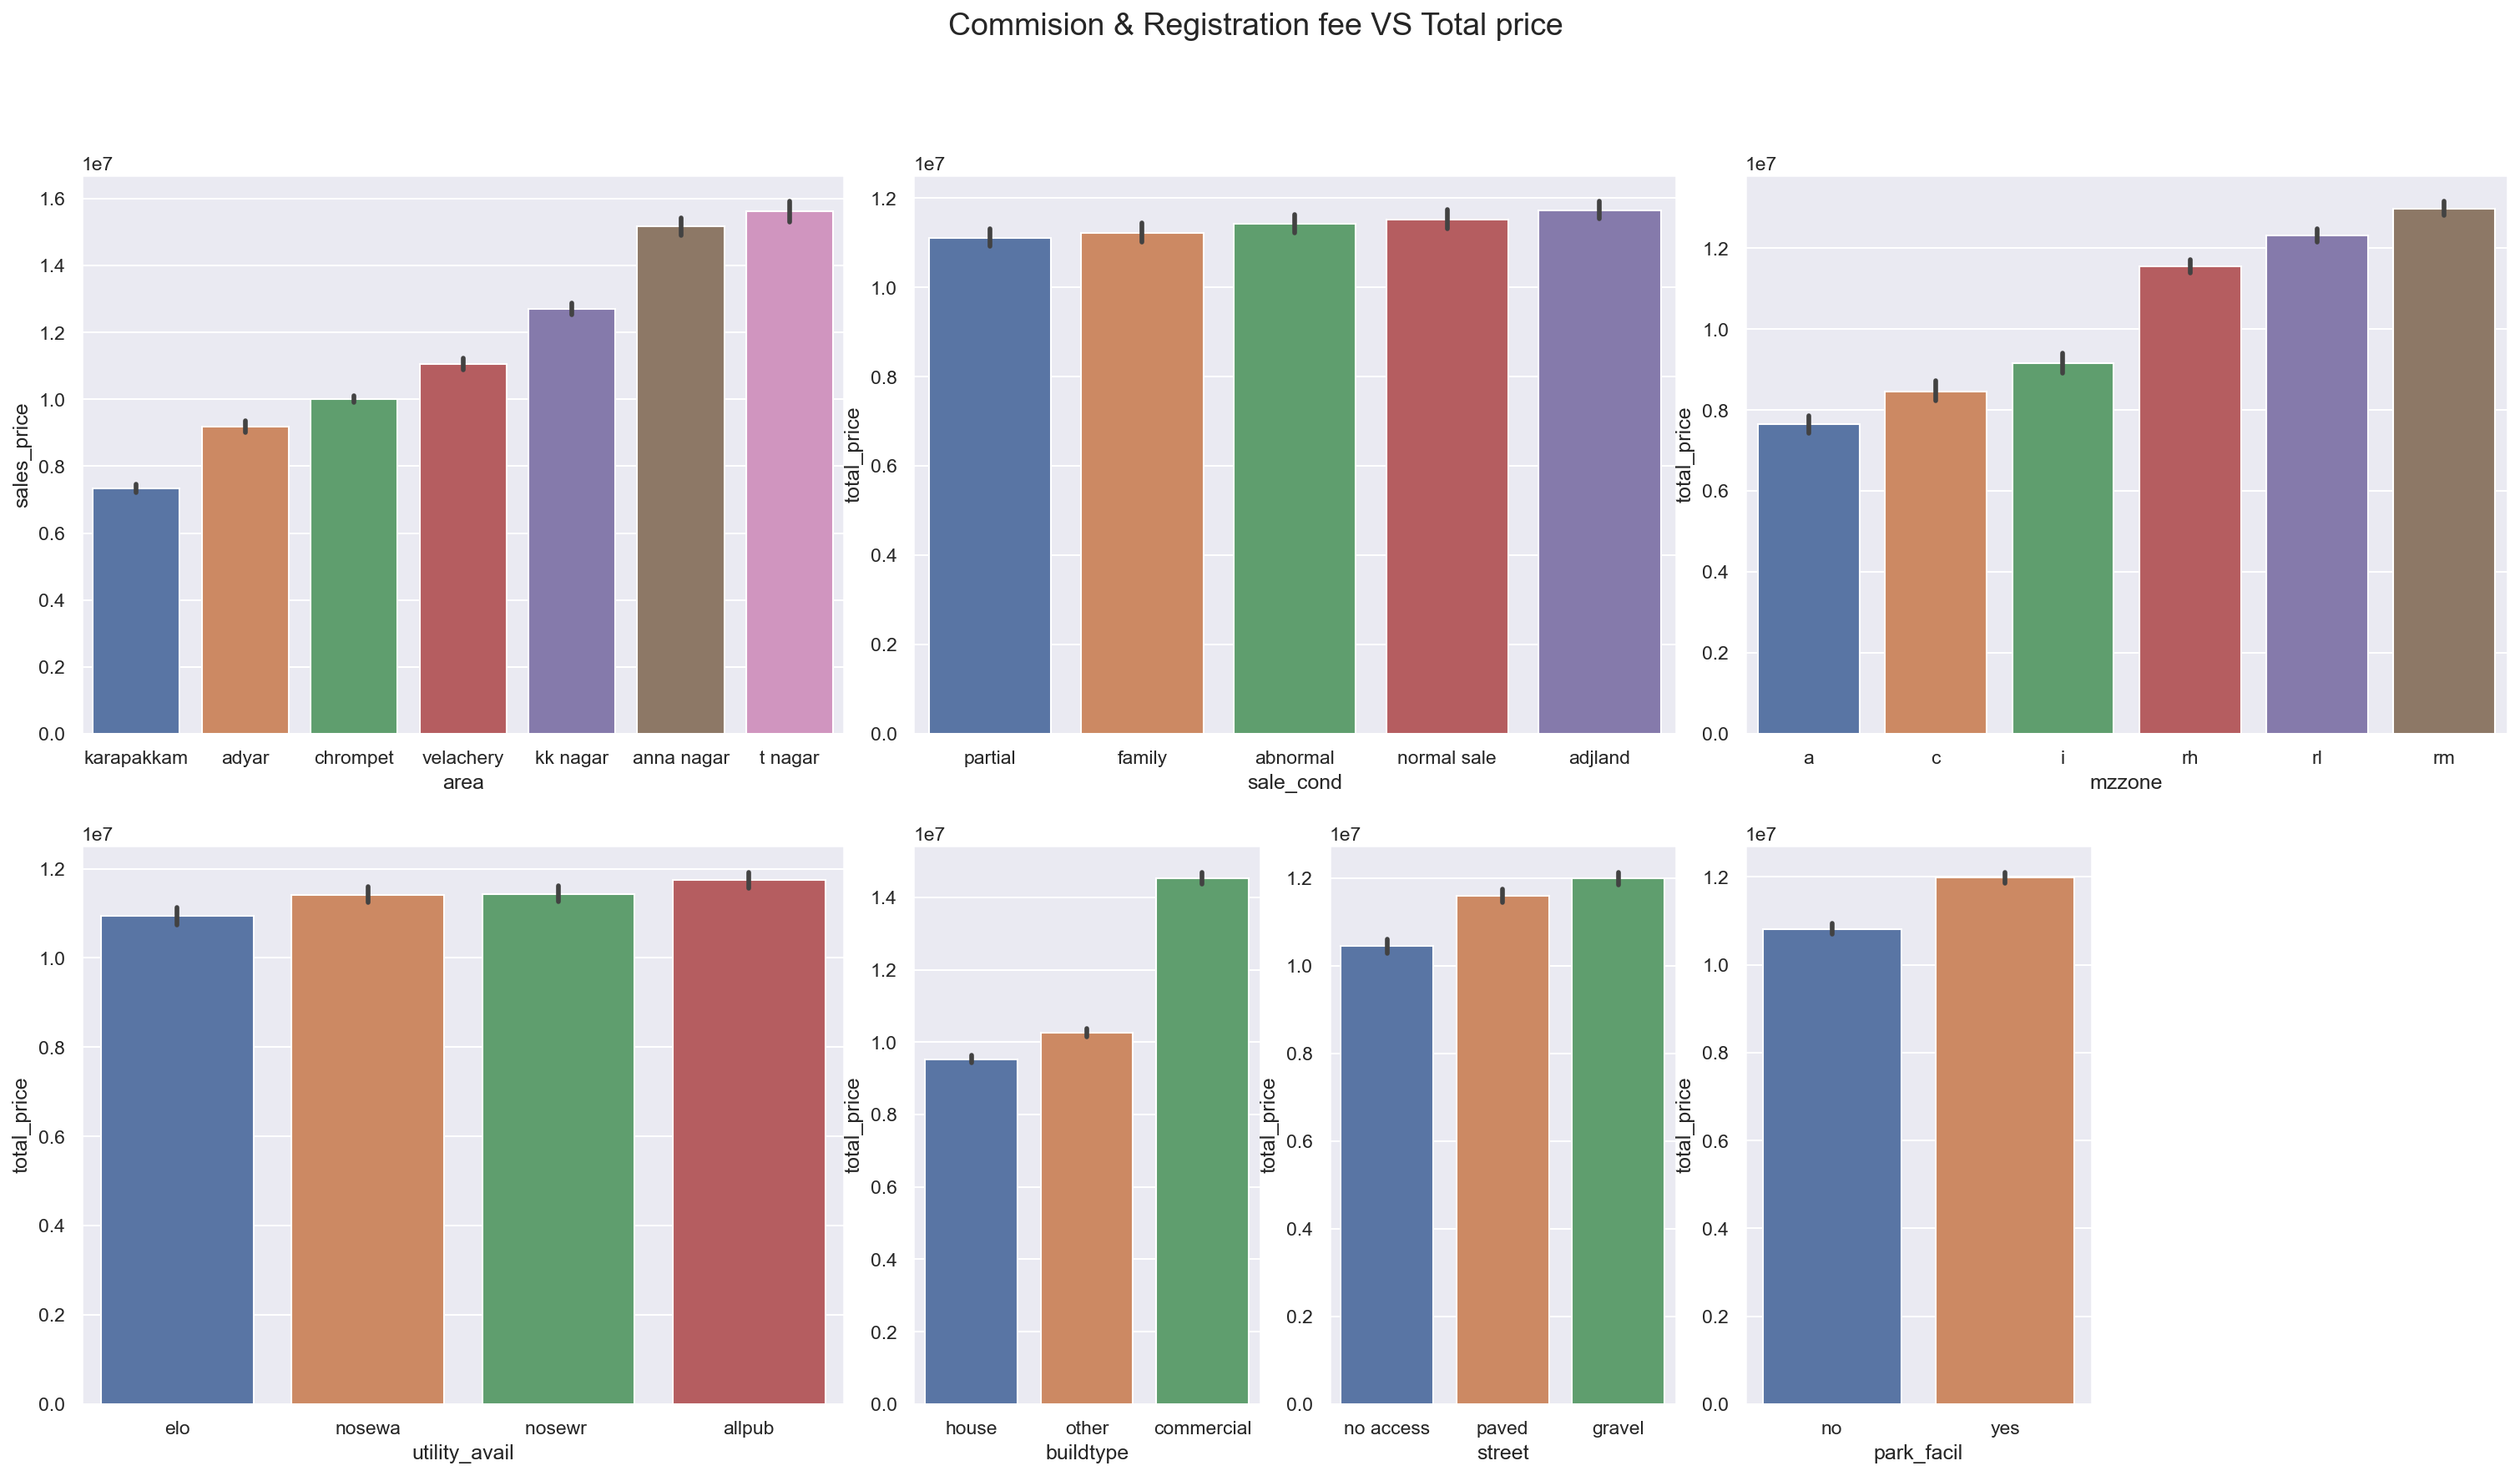

In [11]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=data.area,y=data.sales_price,order=data.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=data.sale_cond,y=data.total_price,order=data.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=data.mzzone,y=data.total_price,order=data.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=data.utility_avail,y=data.total_price,order=data.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=data.buildtype,y=data.total_price,order=data.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=data.street,y=data.total_price,order=data.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=data.park_facil,y=data.total_price,order=data.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

Interpretation:- 

From the graphs we can see that,
> 1. The karapakkam area has the least avg sales price and t nagar has the highest average sales price.
> 2. Agricultural area has the least demand and sales price tags
> 3. Sales prices does not vary with utility available nearby
> 4. Commercial buildings have the higest sale prices
> 5. Price increases with availability of parking facility
> 6. Houses with gravel roads have higher price tags than with no accesibility

Sale condition and utility availability does not change the sales price of the buildings. Hence these data will be of our least concern

# Encoding

Here we will convert the catagorical data into numerical ones so that it becomes easier for the prcessor to understand

## OneHotEncoder
Here we are encoding nominal categorical columns which don't have any order present in them with OneHotEncoder. But to be simple we have just used get_dummies feature from pandas.

In [12]:
data = pd.get_dummies(data,columns=['buildtype'])

## Label Encoder - Mapping

Here we will assign certain values to the catagories for each column so that it will be easier to encode


In [13]:
# Encoding the area column order-wise 
data.area = data.area.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})

# Encoding the sale_cond column order-wise 
data.sale_cond = data.sale_cond.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

# Encoding the park_facil column order-wise 
data.park_facil = data.park_facil.map({'yes':1,
                                       'no':0})

# Encoding the utility_avail column order-wise 
data.utility_avail = data.utility_avail.map({'elo' : 1, 
                                             'nosewa' : 2, 
                                             'nosewr ' : 3,
                                             'allpub' : 4})
                                          
# Encoding the street column order-wise 
data.street = data.street.map({'no access' : 1,
                               'paved' : 2, 
                               'gravel' : 3})


# Encoding the mzzone column order-wise 
data.mzzone = data.mzzone.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 4,
                               'rm' : 6})

In [14]:
# Removing unnecessary columns and Rearranging the columns of dataframe 
data = data.reindex(columns = ['area', 'sale_cond', 'park_facil',
       'buildtype_commercial', 'buildtype_house','buildtype_other', 'utility_avail',
       'street', 'mzzone', 'property_age', 'int_sqft', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
        'qs_overall', 'reg_fee', 'commis', 'sales_price', 'total_price'])

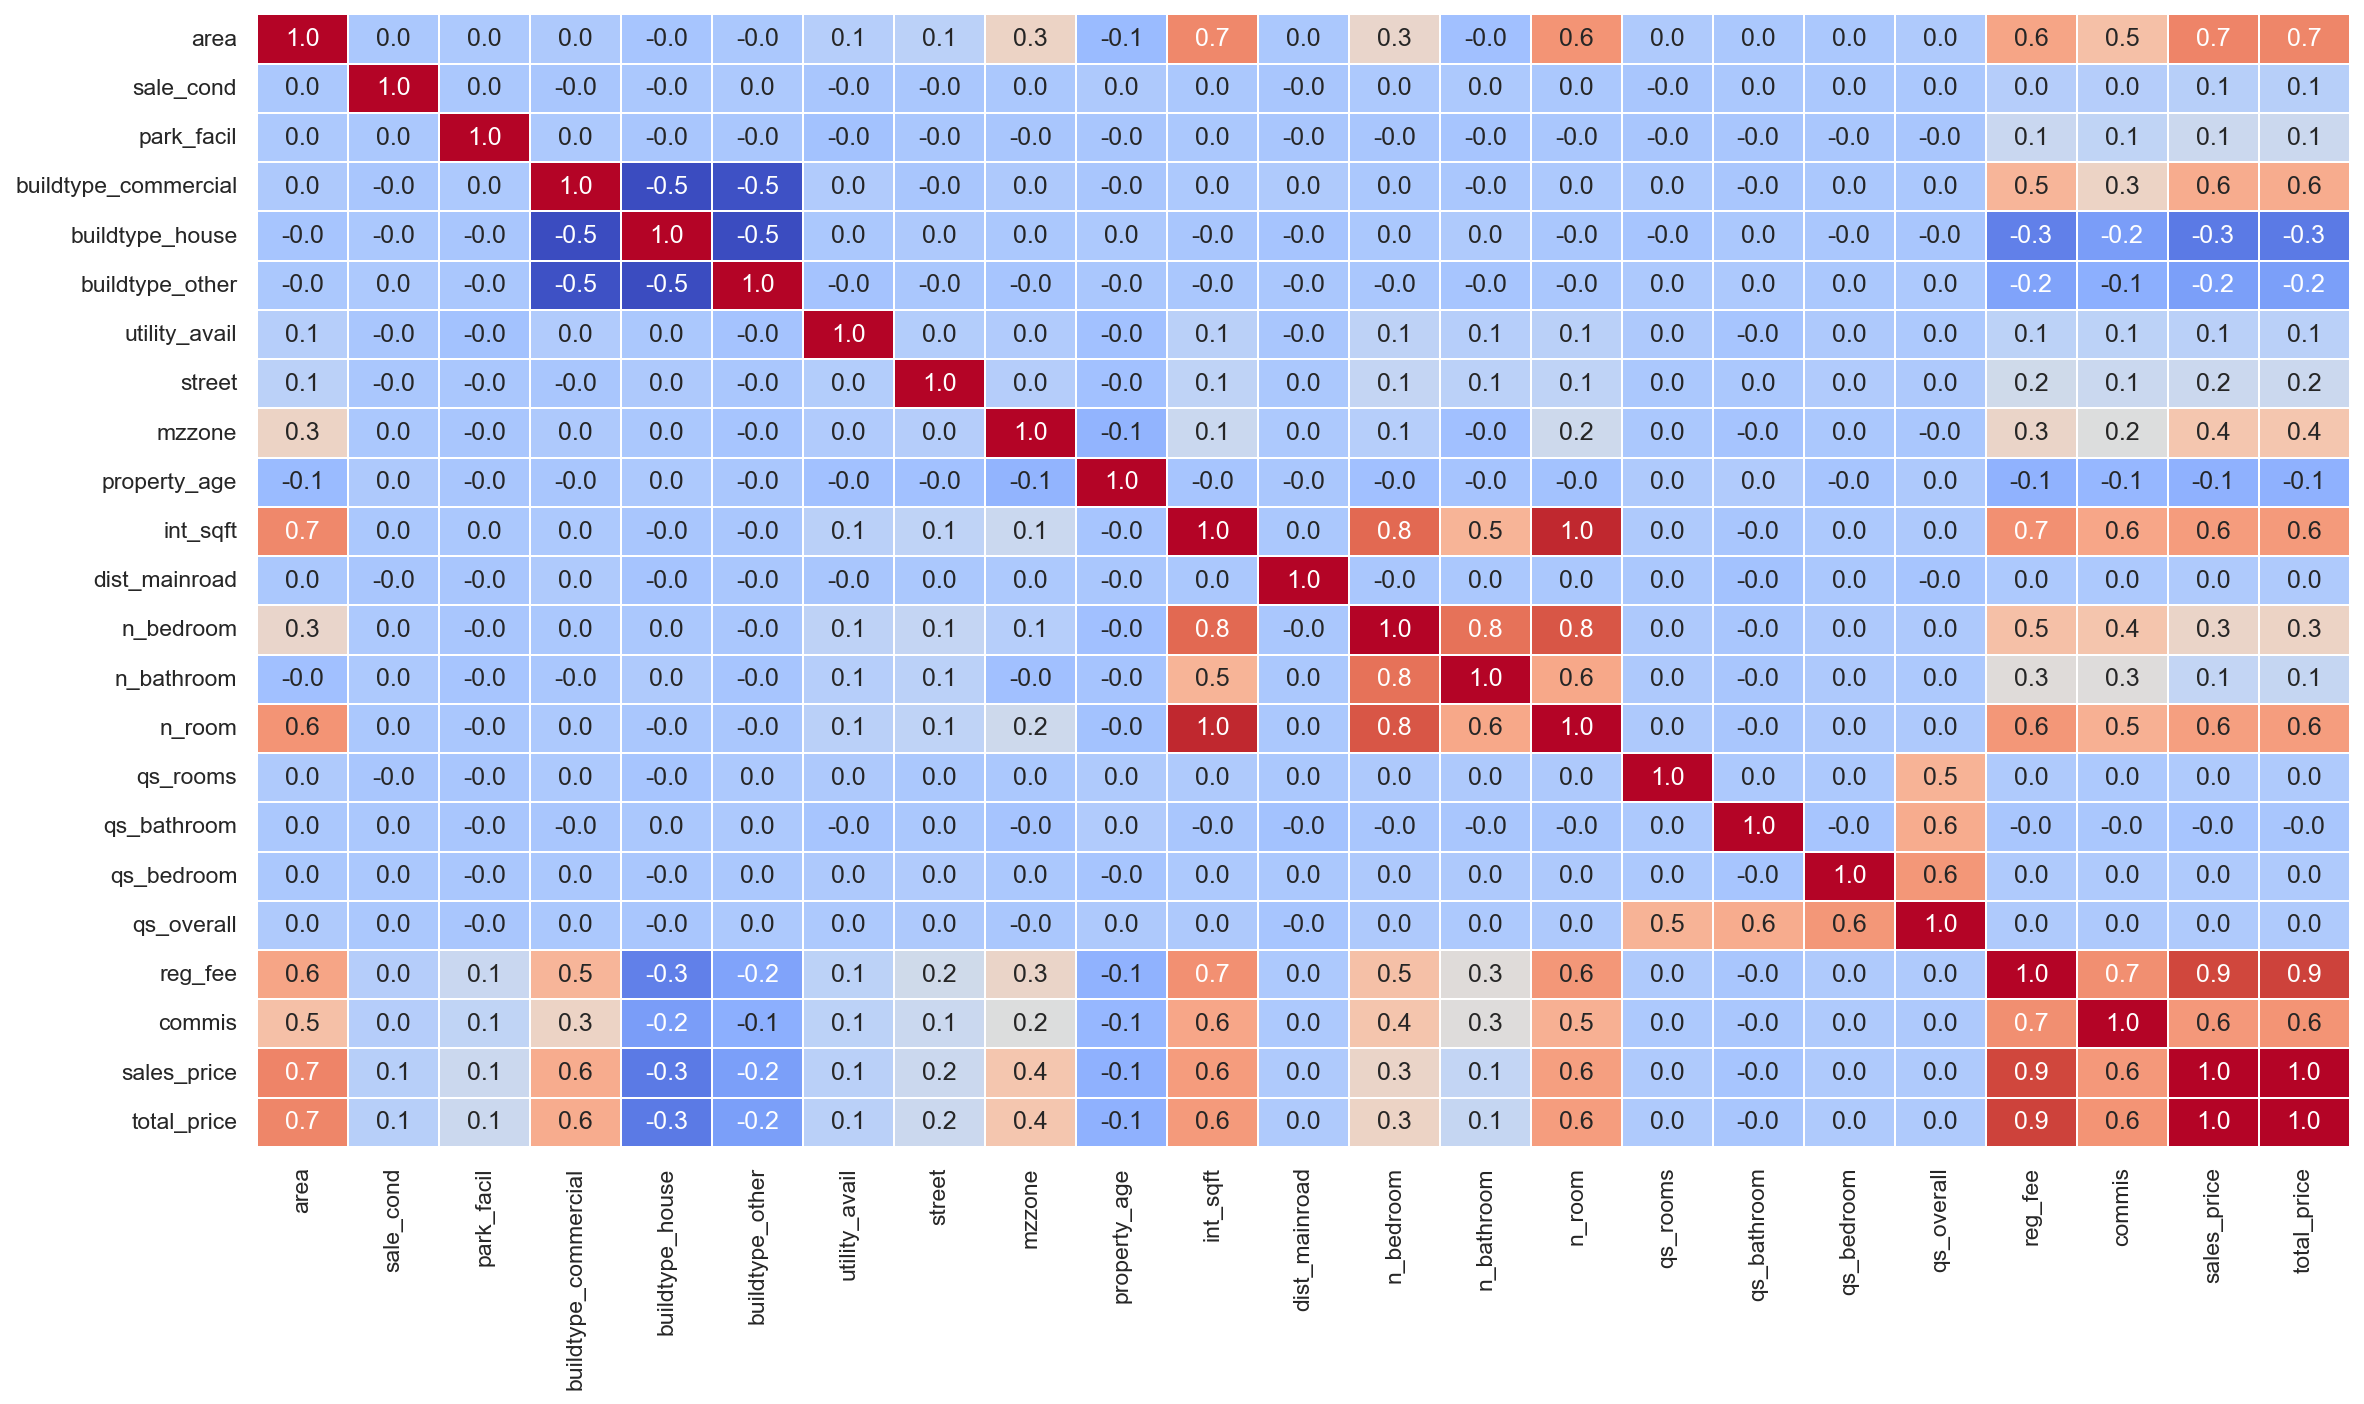

In [15]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

**Interpretation after Encoding**
> 1. After Encoding we can see the correlations between the catagorical data and the continuous data
> 2. Commercial buildings are showing medium positive correlation to total sales price whereas negative correlation for house and other buildtypes
> 3. Room Quantity also shows slight positive correlation with the zoning




In [16]:
data.head(3)

area  sale_cond  park_facil  buildtype_commercial  buildtype_house  \
0     1          3           1                     1                0   
1     6          3           0                     1                0   
2     2          3           1                     1                0   

   buildtype_other  utility_avail  street  mzzone  property_age  int_sqft  \
0                0              4       2       1            44      1004   
1                0              4       3       4            11      1986   
2                0              1       3       5            20       909   

   dist_mainroad  n_bedroom  n_bathroom  n_room  qs_rooms  qs_bathroom  \
0            131          1           1       3       4.0          3.9   
1             26          2           1       5       4.9          4.2   
2             70          1           1       3       4.1          3.8   

   qs_bedroom  qs_overall  reg_fee  commis  sales_price  total_price  
0         4.9       4.330   380000  144400      7600000      8124400  
1         2.5       3.765   760122  304049     21717770     22781941  
2         2.2       3.090   421094   92114     13159200     13672408

In [17]:
# Removing unnecessary features thich has negligible relation with total_price
df = data.copy()
df.drop(['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee',	'commis'], axis=1, inplace=True)

In [18]:
input_cols = ['area', 'sale_cond', 'park_facil', 'buildtype_commercial',	'buildtype_house',
              'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age',
              'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room']

target_cols = 'sales_price'
target1_cols = 'total_price'

input = df[input_cols].copy()
target = df[target_cols].copy()
target1 = df[target1_cols].copy()

## Splitting the data for training and testing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = 7)

## Scaling

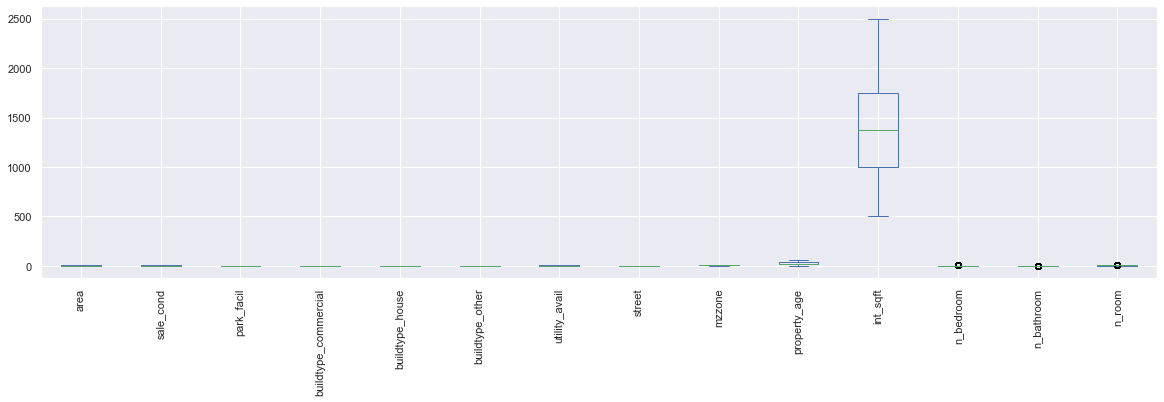

In [20]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

The spread of the variable in in_sqft is the viable one as it has more spread for values

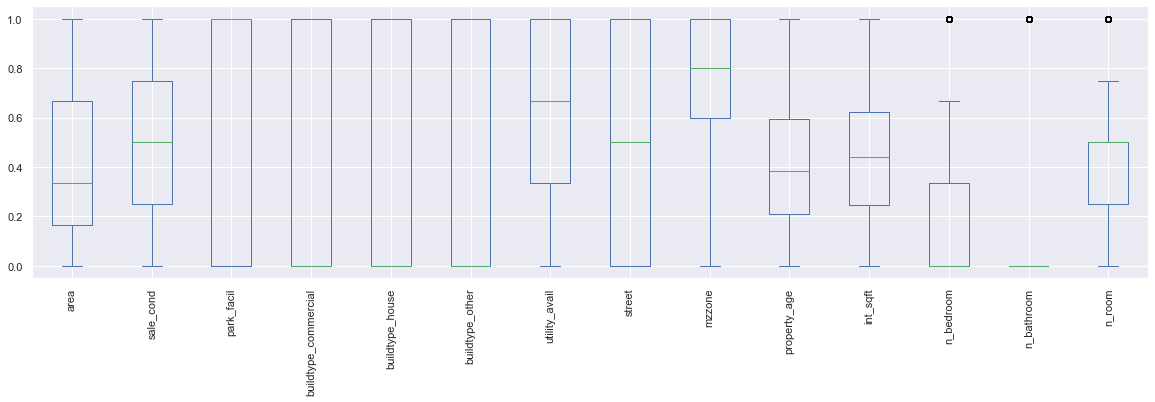

In [21]:
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

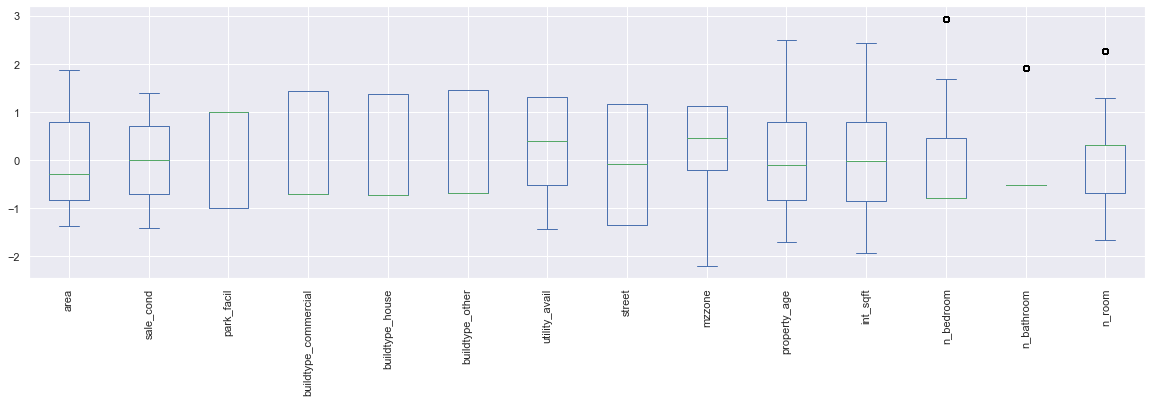

In [22]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()

Here we have used MinMax scaler and Standard scaler so that the spread of all variables becomes more or less equal. This avoids the model from assuming large values for other variables while training

## Model Training

With the help of all three datas (normal data, minmax data and standard scaler data) we will start building different ML models and try to get the best R-squared values which will be used for prediction 

# LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

# lr = LinearRegression()
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

# lr = LinearRegression()
lr.fit(X_train_mm, y_train)
y_predlrmm = lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

R2- SCORE: 0.9234242599802042
R2- SCORE(Standardscaler): 0.9234242599802044
R2- SCORE(Minmaxscaled): 0.923424259980204


# KNearestNeighbors

Orange and Blue depict RSME for MinMaxScaler and blue


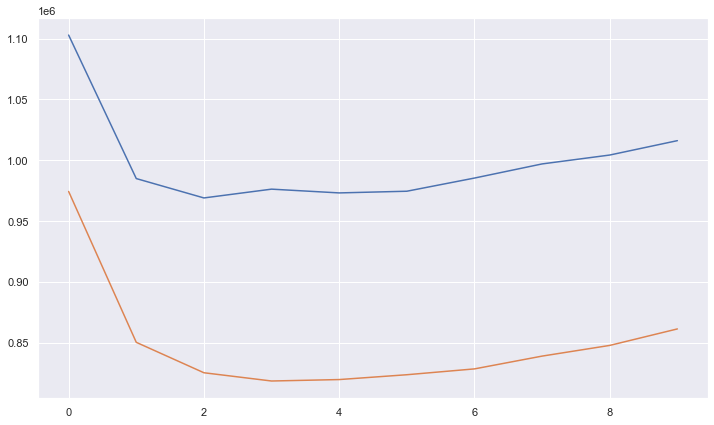

In [24]:
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_mm, y_train)
    pred=model.predict(X_test_mm)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)

rmse_val1 = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_ss, y_train)
    pred=model.predict(X_test_ss)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val1.append(error)
curve1 = pd.DataFrame(rmse_val1)

print('Orange and Blue depict RSME for MinMaxScaler and blue')
plt.figure(figsize=(12,7))
plt.plot(curve)
plt.plot(curve1)
plt.show()

In [25]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_mm, y_train)
y_predknn_mm = knn.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_mm))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_ss, y_train)
y_predknn_ss = knn.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_ss))

R2- SCORE: 0.43314276289831866
R2- SCORE(Minmaxscaled): 0.9338292932490762
R2- SCORE(Standardscaler): 0.9527770963012473


# DecisionTree

In [26]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

R2- SCORE: 0.975206053739922
R2- SCORE(Minmaxscaled): 0.9750241735008122
R2- SCORE(Standardscaler): 0.9745591787958112


## Ensamble Learning

## Voting Regressor

In [27]:
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=100)
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
gbr = GradientBoostingRegressor(learning_rate=.5)
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr), ('rf', rf), ('xg', xg), ('gbr', gbr), ('etr', etr)])

vr.fit(X_train, y_train);
y_pred_vr = vr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_vr))

vr.fit(X_train_ss, y_train);
y_pred_vrss = vr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_vrss))

vr.fit(X_train_mm, y_train);
y_pred_vrmm = vr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_vr))

R2- SCORE: 0.9789888394761138
R2- SCORE(Standardscaler): 0.9895118553756174
R2- SCORE(MinMaxScaler): 0.9789888394761138


## Random Forest

In [28]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_mm, y_train);
y_pred_rfmm = rf.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_ss, y_train);
y_pred_rfss = rf.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))

R2- SCORE: 0.9869989520782433
R2- SCORE(minmaxscaled): 0.9872777787305295
R2- SCORE(Standardscaler): 0.9869555194574698


## Extra Tree Regressor

In [29]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_etr))

y_pred_etrmm = etr.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_etrmm))

y_pred_etrss = etr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_etrss))

R2- SCORE: 0.990943175687814
R2- SCORE(minmaxscaled): -3.4543088231107575
R2- SCORE(Standardscaler): -2.9228905733870048


## GradientBoostingRegressor

In [30]:
for lr in [0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.1  Train score :  0.9918884151594325  Test score :  0.9912206119939374
Learning rate :  0.3  Train score :  0.997053105407478  Test score :  0.996350194502074
Learning rate :  0.5  Train score :  0.9977218437506626  Test score :  0.996924480321312
Learning rate :  0.8  Train score :  0.9977596041412032  Test score :  0.9961654325982658
Learning rate :  1  Train score :  0.9979310033973539  Test score :  0.9966543907955525


In [31]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

gbr.fit(X_train_mm, y_train)
y_pred_gbrmm = gbr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

gbr.fit(X_train_ss, y_train)
y_pred_gbrss = gbr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.996924480321312
R2- SCORE(MinMaxScaler): 0.996931879791019
R2- SCORE(Standardscaler): 0.9969334496441753


# XGBoost

In [32]:
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.2  Train score :  0.9992660104447402  Test score :  0.9973395154694097
Learning rate :  0.5  Train score :  0.9993955180513335  Test score :  0.9945515971835168
Learning rate :  0.7  Train score :  0.9994957696918326  Test score :  0.9923636387616817
Learning rate :  0.8  Train score :  0.9995920937678331  Test score :  0.991359456393351
Learning rate :  1  Train score :  0.9995570716304891  Test score :  0.9858694839363642


In [33]:
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_gbr = xg.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9923636387616817
R2- SCORE(MinMaxScaler): 0.9923606135074644
R2- SCORE(Standardscaler): 0.9922622947190022


## Prediction

### Prediction on Training Data

In [39]:
training_data_prediction = model.predict(X_train)

In [40]:
print(training_data_prediction)

[12817406.  13691002.   4646042.5 ...  9463685.  15443091.   8237084. ]


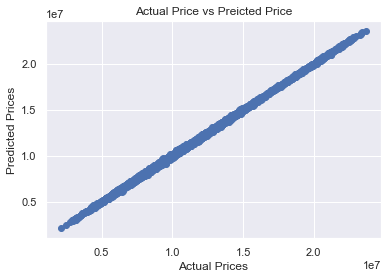

In [41]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Interpretation:- 

Here after training all kinds of model we can see that MinMaxScaled or StandardScaled data model doesn't matter make much difference they give very similar results. But we can surely say that GradientBoostingRegressor and XGBRegressor outperformed most of the machine learning model and GradientBoostingRegressor give 0.99693 as R2-score and XGBRegressor gives 0.997693 as R2-score and I would also like to mention ExtraTreesRegressor with R2-score of 0.99094. The results of all the models of the child being trained in this project I mentioned below:


*   GradientBoostingRegressor give score of 0.99693 as R2-score.
*   XGBRegressor gives score of 0.997693 as R2-score.
*   ExtraTreesRegressor gives score of 0.99094 as R2-score.
*   RandomForestRegressor gives score of 0.9867256 as R2-score.
*   LinearRegression gives score of 0.923446 as R2-score.
*   KNeighborsRegressor gives score of 0.952777 
*   VotingRegressor gives score of 0.97596 as R2-score.

The scatter plot for prediction shows a liner dependencies of both actual sales price and predicted sales price

# Conclusion:

> 1. XGBRegressor is the best model to predict the price of the houses
> 2. The karapakkam area has the least avg sales price and t nagar has the highest average sales price.
> 3. Agricultural area has the least demand and sales price tags
> 4. Sales prices does not vary with utility available nearby
> 5. Commercial buildings have the higest sale prices
> 6. Price increases with availability of parking facility
> 7. Houses with gravel roads have higher price tags than with no accesibility
> 8. Some houses are relatively new and majority of the houses are below 30 years of age. Average house age is 20
> 9. Many Houses have a single bedroom followed by two bedroom houses
> 10. Mjority of the houses have single bathrooms. 20% of the bedrooms dont have attached bathrooms
> 11. Many houses lie in 'rh', 'rl' and 'rm' zones
> 12. Registration fee is generally on the lower side, increases with increase in interior area and number of rooms

